In [47]:
import requests
from bs4 import BeautifulSoup
import sqlite3

# データベースの作成
def create_database():
    conn = sqlite3.connect('suumo_data.db')
    c = conn.cursor()
    c.execute('''
        CREATE TABLE IF NOT EXISTS listings (
            id INTEGER PRIMARY KEY,
            price INTEGER,
            age INTEGER
        )
    ''')
    conn.commit()
    conn.close()

def insert_listing(price, age):
    conn = sqlite3.connect('suumo_data.db')
    c = conn.cursor()
    c.execute('''
        INSERT INTO listings (price, age) VALUES (?, ?)
    ''', (price, age))
    conn.commit()
    conn.close()

def get_data_from_suumo():
    url = "https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=13&sc=13101&sc=13102&sc=13103&sc=13104&sc=13105&sc=13113&sc=13106&sc=13107&sc=13108&sc=13118&sc=13121&sc=13122&sc=13123&sc=13109&sc=13110&sc=13111&sc=13112&sc=13114&sc=13115&sc=13120&sc=13116&sc=13117&sc=13119&cb=0.0&ct=9999999&et=9999999&cn=9999999&mb=0&mt=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&fw2=&srch_navi=1"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    for listing in soup.find_all("div", class_="cassetteitem"):
        try:
            # 賃料データ
            price_span = listing.find("span", class_="cassetteitem_other-emphasis ui-text--bold")
            if price_span:
                price_text = price_span.get_text().replace("万円", "").replace(",", "").strip()
                price = int(float(price_text) * 10000)  # 万円を円に換算
            else:
                print("賃料のデータが見つかりませんでした")
                continue

            # 築年数データの取得
            detail_col3 = listing.find("li", class_="cassetteitem_detail-col3")
            if detail_col3:
                age_text_div = detail_col3.find_all("div")[0]
                if age_text_div:
                    age_text = age_text_div.get_text().strip()
                    if "新築" in age_text:
                        age = 0
                    else:
                        age = int(age_text.replace("築", "").replace("年", "").strip())
                    insert_listing(price, age)
                    print(f"Inserted price: {price}, age: {age}")
                else:
                    print("築年数テキストの取得に失敗しました")
            else:
                print("築年数のデータが見つかりませんでした")

        except Exception as e:
            print(f"Error occurred during processing a listing: {e}")

try:
    create_database()
    get_data_from_suumo()
except Exception as e:
    print(f"Error occurred: {e}")

Inserted price: 127000, age: 0
Inserted price: 110000, age: 11
Inserted price: 100500, age: 5
Inserted price: 154000, age: 19
Inserted price: 123000, age: 7
Inserted price: 87000, age: 7
Inserted price: 124000, age: 0
Inserted price: 130000, age: 12
Inserted price: 144000, age: 12
Inserted price: 180000, age: 17
Inserted price: 123000, age: 2
Inserted price: 77000, age: 7
Inserted price: 100000, age: 12
Inserted price: 100000, age: 4
Inserted price: 90000, age: 15
Inserted price: 227000, age: 0
Inserted price: 105000, age: 6
Inserted price: 118000, age: 6
Inserted price: 118000, age: 6
Inserted price: 134000, age: 2
Inserted price: 215000, age: 3
Inserted price: 215000, age: 3
Inserted price: 100000, age: 13
Inserted price: 104000, age: 6
Inserted price: 160000, age: 13
Inserted price: 98000, age: 8
Inserted price: 71000, age: 1
Inserted price: 95000, age: 0
Inserted price: 220000, age: 4
Inserted price: 148000, age: 7


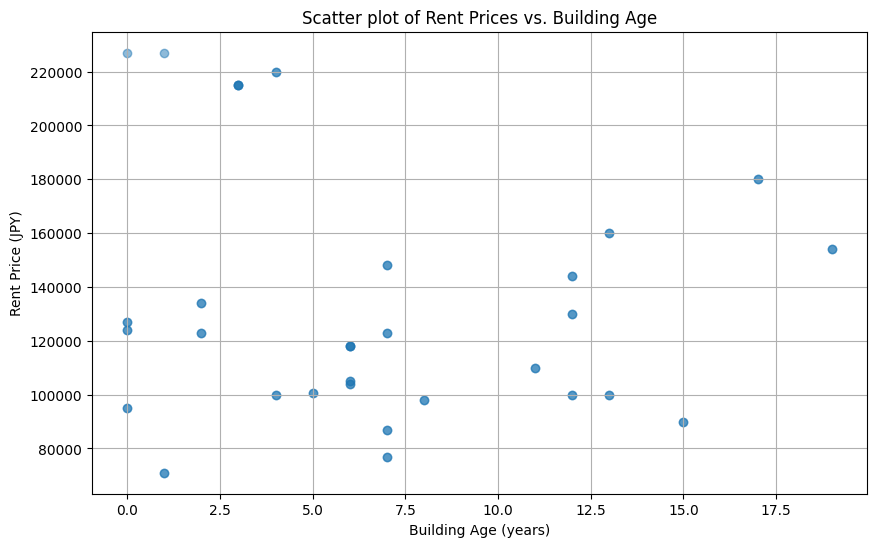

In [48]:
import sqlite3
import matplotlib.pyplot as plt

# DBからデータを読み込み
def load_data():
    conn = sqlite3.connect('suumo_data.db')
    c = conn.cursor()
    c.execute('SELECT price, age FROM listings')
    data = c.fetchall()
    conn.close()
    return data

# データの読み込み
data = load_data()

# データを分解する
prices = [record[0] for record in data]
ages = [record[1] for record in data]

# 散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(ages, prices, alpha=0.5)
plt.title('Scatter plot of Rent Prices vs. Building Age')
plt.xlabel('Building Age (years)')
plt.ylabel('Rent Price (JPY)')
plt.grid(True)

# 散布図の表示
plt.show()